### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [162]:
data = pd.read_csv('C:/Berkeley/Berkeley_NM/coupons.csv')


In [163]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [164]:
# Describing the dataset

data_describe = data.describe()
data_describe

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [165]:
# Understanding the data types
data_info = data.info()
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [166]:
# Getting the missing data information 

data_nulls = None
data_nulls = data.isnull().sum()

type(data_nulls)
print(data_nulls)
print(type(data_nulls))

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
<class 'pandas.core.series.Series'>


#### _Conclusion : The missing data_

_Almost all entries in the column named `car` are missing. For the analysis purpose, this column will be disregarded._

_The missing values for the other columns will be dropped: `CofeeHouse`, `CarryAway`, `Bar`,`RestaurantLessThan20`, `Restaurant20To50`_.

3. Decide what to do about your missing data -- drop, replace, other...

In [167]:
# Dropping the missing data

data_cleaned = None
data_cleaned = data.dropna(subset = ['CarryAway','Bar','RestaurantLessThan20','Restaurant20To50', 'CoffeeHouse' ])
data_cleaned
data_cleaned.shape

(12079, 26)

In [168]:
# Dropping the entire car column

data_cleaned = data_cleaned.drop(['car'], axis=1)
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nul

_The new dataset "data_cleaned", will be used in the following analyses. This file does not contain null data and has one less column than the original file._

4. What proportion of the total observations chose to accept the coupon? 



In [169]:
# Calculating, on the original dataset, the proportion that accepted the coupon:

propor_total_obeservations = data['Y'].value_counts(normalize = True)
print(type(propor_total_obeservations))
propor_total_obeservations

<class 'pandas.core.series.Series'>


1    0.568433
0    0.431567
Name: Y, dtype: float64

In [170]:
# Calculating, on the cleaned dataset, the proportion that accepted the coupon:

propor_total_obeservations_cleaned = data_cleaned['Y'].value_counts(normalize = True)
print(type(propor_total_obeservations_cleaned))
propor_total_obeservations_cleaned

<class 'pandas.core.series.Series'>


1    0.569335
0    0.430665
Name: Y, dtype: float64

_How noted below, the proportion of the total observations that chose to accept the coupon it is around 0.57.
The difference of this value using the original file and the treated file is minimal, which confirms that cleaning the null data will not affect the analysis._

| Original Dataset  | Cleaned Data Set   |
| ----------------- | ------------------ |
| 0.568433          | 0.569335           |

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Count by Class of Coupons')

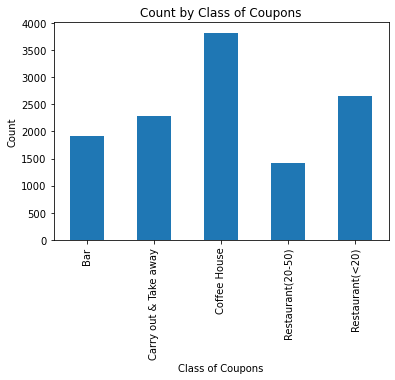

In [171]:
# Bar plot coupon column
data_cleaned.coupon.value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel("Class of Coupons")
plt.ylabel("Count")
plt.title("Count by Class of Coupons")

_According to the chart above, the most offered class of coupons was Coffee House._

6. Use a histogram to visualize the temperature column.

In [172]:
fig4 = px.histogram(data_cleaned,x="temperature",title="Histogram of Temperatures",labels={"temperature": "Temperature"},color_discrete_sequence = px.colors.qualitative.Set2 )
fig4.show()

_The temperature with the highest occurrence in the dataframe is 80._

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [173]:
# Keeping only dataframe entries referring to bar coupons

data_cleaned_bar = data_cleaned.loc[data['coupon'].str.contains("Bar")]
data_cleaned_bar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1913 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passanger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1913 non-null   object
 9   maritalStatus         1913 non-null   object
 10  has_children          1913 non-null   int64 
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-null   object
 14  Bar                   1913 non-null   object
 15  CoffeeHouse           1913 non-null 

_The new data frame, containing only bar coupons has 1913 entries._

2. What proportion of bar coupons were accepted?


In [174]:
# Calculating the proportion of bar coupons accepted

propor_bar_coupons_accepted = data_cleaned_bar ['Y'].value_counts(normalize = True)
print(type(propor_bar_coupons_accepted))
propor_bar_coupons_accepted

<class 'pandas.core.series.Series'>


0    0.588082
1    0.411918
Name: Y, dtype: float64

_About 41% of bar coupons were accepted._

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'never'),
  Text(1, 0, 'less1'),
  Text(2, 0, '1~3'),
  Text(3, 0, 'gt8'),
  Text(4, 0, '4~8')])

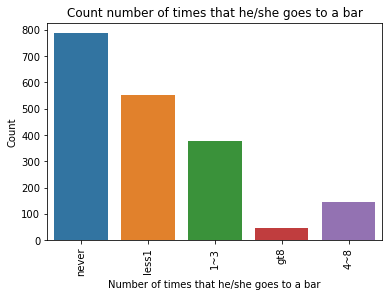

In [175]:
# Understanding the variable bar
fig = sns.countplot(x="Bar", data=data_cleaned_bar)
plt.xlabel("Number of times that he/she goes to a bar")
plt.ylabel("Count")
plt.title("Count number of times that he/she goes to a bar")
plt.xticks(rotation=90)


In [176]:
# Creating a data subset with who went to a bar more than 3 times a month.
list_of_bar_more3 = ['gt8','4~8']
data_cleaned_bar_more3 = None
data_cleaned_bar_more3 = data_cleaned_bar.query("Bar in @list_of_bar_more3")
data_cleaned_bar_more3


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
156,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,0,1,1
167,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,1,0,1
171,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,1,1,0,1,1
454,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,31,Single,...,gt8,gt8,gt8,gt8,1,0,0,0,1,0
465,Home,Alone,Sunny,55,6PM,Bar,1d,Male,31,Single,...,gt8,gt8,gt8,gt8,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12198,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,1,0,0,1,1
12199,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,1,0,0,1,1
12202,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,1,0,0,1,1
12207,Home,Partner,Sunny,30,10PM,Bar,2h,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,1,1,0,1,1


In [177]:
# The acceptance rate between those who went to a bar more than 3 times a month.

propor_bar_more3 = data_cleaned_bar_more3['Y'].value_counts(normalize = True)
print(type(propor_bar_more3))
propor_bar_more3

<class 'pandas.core.series.Series'>


1    0.761658
0    0.238342
Name: Y, dtype: float64

In [178]:
# Creating a data subset with who went to a bar 3 or fewer times a month.

list_of_bar_less3 = ['never', 'less1', '1~3']
data_cleaned_bar_less3 = None
data_cleaned_bar_less3 = data_cleaned_bar.query("Bar in @list_of_bar_less3")
data_cleaned_bar_less3

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [179]:
# The acceptance rate between those who went to a bar 3 times or less.

propor_bar_less3 = data_cleaned_bar_less3['Y'].value_counts(normalize = True)
print(type(propor_bar_less3))
propor_bar_less3

<class 'pandas.core.series.Series'>


0    0.627326
1    0.372674
Name: Y, dtype: float64

_How noted below, the acceptance rate between those who went to a bar more than 3 times a month is much higher than those who went 3 times and less._


| Cleaned Dataset Bar  | Cleaned Dataset Bar More3  | Cleaned Dataset Bar 3 and less
| -------------------- | -------------------------- | -------------------------------
| 0.411918             | **0.761658**               | 0.372674

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Text(0.5, 1.0, 'Count by Age')

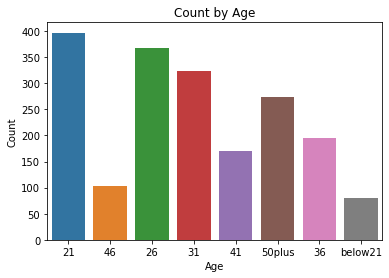

In [180]:
# Understanding the variable age

fig = sns.countplot(x="age", data=data_cleaned_bar)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Count by Age")

In [181]:
#Creating a subset with who go to a bar more than once a month and are over the age of 25 to the all others

list_of_bar_more1 = ['1~3','4~8', 'gt8']
list_of_age_over25 = ['26','31','36','41','46','50plus' ]
data_cleaned_bar_more1over25 = None
data_cleaned_bar_more1over25 = data_cleaned_bar.query("Bar in @list_of_bar_more1 and age in@list_of_age_over25")
data_cleaned_bar_more1over25


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,1,0,1
127,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,1,1,0,1,1
156,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,0,1,1
167,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12481,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12482,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12485,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12488,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1


In [182]:
# Calculating the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25

propor_bar_more1over25 = data_cleaned_bar_more1over25['Y'].value_counts(normalize = True)
print(type(propor_bar_more1over25))
propor_bar_more1over25

<class 'pandas.core.series.Series'>


1    0.689826
0    0.310174
Name: Y, dtype: float64

In [183]:
#Creating a subset with who go to a bar less than once a month and are under the age of 25

list_of_bar_less1 = ['never', 'less1']
list_of_age_under25 = ['21','below21' ]
data_cleaned_bar_less1under25 = None
data_cleaned_bar_less1under25 = data_cleaned_bar.query("Bar in @list_of_bar_less1 and age in@list_of_age_under25")
data_cleaned_bar_less1under25


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
195,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,never,gt8,1~3,less1,1,0,0,0,1,0
206,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,never,gt8,1~3,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12613,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,21,Unmarried partner,...,4~8,1~3,1~3,less1,1,1,0,0,1,0
12614,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,21,Unmarried partner,...,4~8,1~3,1~3,less1,1,1,0,0,1,0
12617,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Female,21,Unmarried partner,...,4~8,1~3,1~3,less1,1,1,0,0,1,0
12620,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Female,21,Unmarried partner,...,4~8,1~3,1~3,less1,1,1,0,0,1,0


In [184]:
# Calculating the acceptance rate between drivers who go to a bar less than once a month and are under the age of 25

propor_bar_less1under25 = data_cleaned_bar_less1under25['Y'].value_counts(normalize = True)
print(type(propor_bar_less1under25))
propor_bar_less1under25

<class 'pandas.core.series.Series'>


0    0.61165
1    0.38835
Name: Y, dtype: float64

_Comparing the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others, we can note that, how it was expected, the acceptance is higher in the group over 25 / more than once a month._


| Cleaned Dataset Bar More1 Over25   | Cleaned Dataset Bar Less1 Under25   
| --------------------------------   | --------------------------------- 
| 0.689826                           | 0.38835              

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 

Text(0.5, 1.0, 'Count by Type of Passanger')

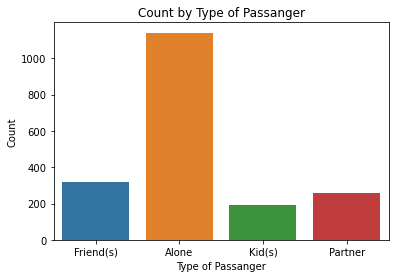

In [185]:
# Understanding the variable Passanger

fig = sns.countplot(x="passanger", data=data_cleaned_bar)
plt.xlabel("Type of Passanger")
plt.ylabel("Count")
plt.title("Count by Type of Passanger")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Architecture & Engineering'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Education&Training&Library'),
  Text(3, 0, 'Unemployed'),
  Text(4, 0, 'Healthcare Support'),
  Text(5, 0, 'Healthcare Practitioners & Technical'),
  Text(6, 0, 'Sales & Related'),
  Text(7, 0, 'Management'),
  Text(8, 0, 'Arts Design Entertainment Sports & Media'),
  Text(9, 0, 'Computer & Mathematical'),
  Text(10, 0, 'Life Physical Social Science'),
  Text(11, 0, 'Personal Care & Service'),
  Text(12, 0, 'Office & Administrative Support'),
  Text(13, 0, 'Construction & Extraction'),
  Text(14, 0, 'Legal'),
  Text(15, 0, 'Retired'),
  Text(16, 0, 'Community & Social Services'),
  Text(17, 0, 'Installation Maintenance & Repair'),
  Text(18, 0, 'Transportation & Material Moving'),
  Text(19, 0, 'Business & Financial'),
  Text(20, 0, 'Protective Service'),
  Text(21, 0, 'Food Preparation &

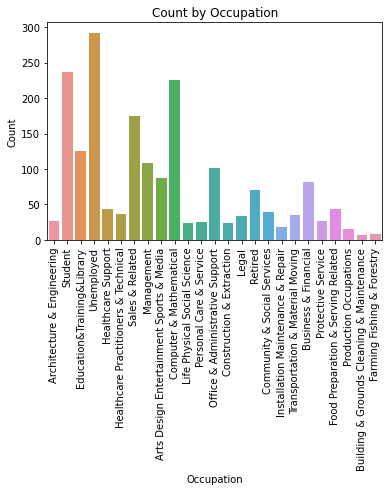

In [186]:
# Understanding the variable Occupation

fig = sns.countplot(x="occupation", data=data_cleaned_bar)
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.title("Count by Occupation")
plt.xticks(rotation=90)            

In [187]:
# Creating a subset with the public of the analysis

list_of_bar_more1 = ['1~3', 'gt8','4~8']
list_of_passanger_notkid = ['Friend(s)','Alone', 'Partner' ]
list_of_occupation = ['Farming Fishing & Forestry']
data_cleaned_bar_More1_notkid_occupation = None
data_cleaned_bar_More1_notkid_occupation = data_cleaned_bar.query("Bar in @list_of_bar_more1 and passanger in@list_of_passanger_notkid and occupation not in@list_of_occupation")
data_cleaned_bar_More1_notkid_occupation


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1
101,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,1,0,1
105,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,1,1,0,1,0
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12500,Work,Alone,Snowy,30,7AM,Bar,1d,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,1,0,1,0
12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,1
12526,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,1
12529,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,0


In [188]:
#Calculating the acceptance rate between drivers who go to bars more than once a month 
# and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

propor_bar_More1_notkid_occupation = data_cleaned_bar_More1_notkid_occupation['Y'].value_counts(normalize = True)
print(type(propor_bar_More1_notkid_occupation))
propor_bar_More1_notkid_occupation

<class 'pandas.core.series.Series'>


1    0.709434
0    0.290566
Name: Y, dtype: float64

In [189]:
# Creating a subset with the group that complement the group created in the step above 
# Kid, go less than once to a bar,  occupation 'Farming Fishing & Forestry'

list_of_bar_more1 = ['1~3', 'gt8','4~8']
list_of_passanger_notkid = ['Friend(s)','Alone', 'Partner' ]
list_of_occupation = ['Farming Fishing & Forestry']
data_cleaned_bar_less1_kid_occupation = None
data_cleaned_bar_less1_kid_occupation = data_cleaned_bar.query("Bar not in @list_of_bar_more1 and passanger not in@list_of_passanger_notkid and occupation in@list_of_occupation")
data_cleaned_bar_less1_kid_occupation

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
8431,No Urgent Place,Kid(s),Rainy,55,10PM,Bar,1d,Male,41,Married partner,...,never,never,1~3,never,1,1,0,0,1,0
8432,No Urgent Place,Kid(s),Snowy,30,6PM,Bar,1d,Male,41,Married partner,...,never,never,1~3,never,1,1,0,0,1,0
9565,Home,Kid(s),Sunny,30,6PM,Bar,2h,Male,31,Married partner,...,less1,less1,1~3,less1,1,1,0,0,1,1


In [190]:
propor_bar_less1_kid_occupation = data_cleaned_bar_less1_kid_occupation['Y'].value_counts(normalize = True)
print(type(propor_bar_less1_kid_occupation))
propor_bar_less1_kid_occupation

<class 'pandas.core.series.Series'>


0    0.666667
1    0.333333
Name: Y, dtype: float64

_The acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is high: **0.709434**_

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '$62500 - $74999'),
  Text(1, 0, '$12500 - $24999'),
  Text(2, 0, '$75000 - $87499'),
  Text(3, 0, '$50000 - $62499'),
  Text(4, 0, '$37500 - $49999'),
  Text(5, 0, '$25000 - $37499'),
  Text(6, 0, '$100000 or More'),
  Text(7, 0, '$87500 - $99999'),
  Text(8, 0, 'Less than $12500')])

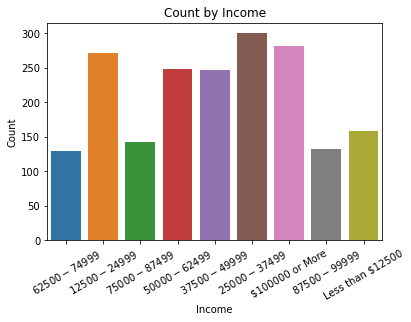

In [191]:
# Understanding de variable income
fig = sns.countplot(x="income", data=data_cleaned_bar)
plt.xlabel("Income")
plt.ylabel("Count")
plt.title("Count by Income")
plt.xticks(rotation=30) 

In [192]:
# Defining lists

# Go to bars more than once a month
list_of_bar_more_1 = ['1~3', 'gt8','4~8']

# Had passengers that were not a kid
list_of_passanger_not_kid = ['Friend(s)','Alone', 'Partner' ]

# Were widowed 
list_marital_state_widowed = ['Widowed']

# Under the age of 30 
list_of_age_under30 = ['21','below21','26']

# Go to cheap restaurants more than 4 times a month 
list_cheap_restaurant_more4 = ['gt8','4~8']

# Income is less than 50K
list_income_less50k = [ 'Less than $12500','$12500 - $24999','$25000 - $37499', '$37500 - $49999']

# First Group: 
# Go to bars more than once a month, had passengers that were not a kid, and were not widowed
first_group = None
first_group = data_cleaned_bar.query("Bar in @list_of_bar_more_1 and passanger in @list_of_passanger_not_kid and maritalStatus not in@list_marital_state_widowed")

# Second Group: 
# Go to bars more than once a month and are under the age of 30
second_group = None
second_group = data_cleaned_bar.query("Bar in @list_of_bar_more_1 and age in @list_of_age_under30")


#Thrir Group
# Go to cheap restaurants more than 4 times a month and income is less than 50K
third_group = None
third_group = data_cleaned_bar.query("RestaurantLessThan20 in @list_cheap_restaurant_more4 and income in @list_income_less50k")




In [193]:
# First Group
propor_first_group = first_group['Y'].value_counts(normalize = True)
print(type(propor_first_group))
propor_first_group

<class 'pandas.core.series.Series'>


1    0.709434
0    0.290566
Name: Y, dtype: float64

In [194]:
# Second Group
propor_second_group = second_group['Y'].value_counts(normalize = True)
print(type(propor_second_group))
propor_second_group

<class 'pandas.core.series.Series'>


1    0.719512
0    0.280488
Name: Y, dtype: float64

In [195]:
# Third Group
propor_third_group = third_group['Y'].value_counts(normalize = True)
print(type(propor_third_group))
propor_third_group

<class 'pandas.core.series.Series'>


0    0.543544
1    0.456456
Name: Y, dtype: float64

_The first and second groups have the higher acceptance rate:_

| First Group   | Second Group  | Third Group   
| --------------| ------------- | -----------
| 0.709434      | 0.719512      | 0.456456      

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

#### Conclusion: 'Bar' coupon

  - According to the analysis that considers only dataframe entries referring to bar coupons, the probability of a driver accepting the coupon is directly related to the number of times the driver frequents bars. 
  - The acceptance rate in the group of drivers who go to bar more than 3 times is 0.761658. This is the most important variable for this kind of coupon.

 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

_The independent investigation will be done considering the 'Coffee House' coupon._

In [196]:
# Creating a subdataset with entries referring to Coffee House coupons

data_cleaned_ch = data_cleaned.loc[data['coupon'].str.contains("Coffee House")]
data_cleaned_ch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3816 entries, 23 to 12681
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3816 non-null   object
 1   passanger             3816 non-null   object
 2   weather               3816 non-null   object
 3   temperature           3816 non-null   int64 
 4   time                  3816 non-null   object
 5   coupon                3816 non-null   object
 6   expiration            3816 non-null   object
 7   gender                3816 non-null   object
 8   age                   3816 non-null   object
 9   maritalStatus         3816 non-null   object
 10  has_children          3816 non-null   int64 
 11  education             3816 non-null   object
 12  occupation            3816 non-null   object
 13  income                3816 non-null   object
 14  Bar                   3816 non-null   object
 15  CoffeeHouse           3816 non-null 

In [197]:
# Calculating the acceptance rate to Coffee House coupons

propor_ch = data_cleaned_ch['Y'].value_counts(normalize = True)
print(type(propor_ch))
propor_ch

<class 'pandas.core.series.Series'>


0    0.503669
1    0.496331
Name: Y, dtype: float64

_The acceptance rate of coffee house coupons is 0.496331._

Text(0.5, 1.0, 'Count by Number of times that he/she goes to a coffee house')

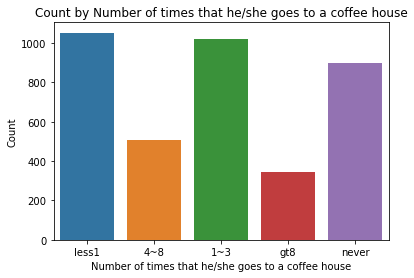

In [198]:
# Bar plot CoffeeHouse column
  
fig = sns.countplot(x="CoffeeHouse", data=data_cleaned_ch)
plt.xlabel("Number of times that he/she goes to a coffee house")
plt.ylabel("Count")
plt.title("Count by Number of times that he/she goes to a coffee house")

In [199]:
# Creating a data subset with who went to a coffee house more than 3 times a month.
list_of_ch_more3 = ['gt8','4~8']
data_cleaned_ch_more3 = None
data_cleaned_ch_more3 = data_cleaned_ch.query("CoffeeHouse in @list_of_ch_more3")

propor_ch_more3 = data_cleaned_ch_more3['Y'].value_counts(normalize = True)
print(type(propor_ch_more3))
propor_ch_more3


<class 'pandas.core.series.Series'>


1    0.672556
0    0.327444
Name: Y, dtype: float64

In [200]:
# Creating a data subset with who went to a coffee 3 times or less a month.
list_of_ch_less3 = ['never', 'less1', '1~3']
data_cleaned_ch_less3 = None
data_cleaned_ch_less3 = data_cleaned_ch.query("CoffeeHouse in @list_of_ch_less3")

propor_ch_less3 = data_cleaned_ch_less3['Y'].value_counts(normalize = True)
print(type(propor_ch_less3))
propor_ch_less3

<class 'pandas.core.series.Series'>


0    0.554095
1    0.445905
Name: Y, dtype: float64

In [201]:
# Checking the acceptance rate by Number of times that he/she goes to a coffee house

ch_acceptance = None
ch_acceptance = data_cleaned_ch.groupby('CoffeeHouse')[['Y']].mean()
print(type(ch_acceptance))
ch_acceptance

<class 'pandas.core.frame.DataFrame'>


,Y
CoffeeHouse,
1~3,0.647694
4~8,0.682446
gt8,0.657895
less1,0.480989
never,0.175223


In [202]:
# Checking the acceptance rate by Number of times that he/she goes cheap restaurant

r20_acceptance = None
r20_acceptance = data_cleaned_ch.groupby('RestaurantLessThan20')[['Y']].mean()
print(type(r20_acceptance))
r20_acceptance

<class 'pandas.core.frame.DataFrame'>


,Y
RestaurantLessThan20,
1~3,0.497857
4~8,0.513736
gt8,0.522042
less1,0.450407
never,0.400000


In [203]:
# Checking the acceptance rate by age

age_acceptance = None
age_acceptance = data_cleaned_ch.groupby('age')[['Y']].mean()
print(type(age_acceptance))
age_acceptance

<class 'pandas.core.frame.DataFrame'>


,Y
age,
21,0.517773
26,0.513174
31,0.483816
36,0.468586
41,0.492114
46,0.506912
50plus,0.419660
below21,0.678322


In [204]:
# Checking the acceptance rate by destination

destination_acceptance = None
destination_acceptance = data_cleaned_ch.groupby('destination')[['Y']].mean()
print(type(destination_acceptance))
destination_acceptance

<class 'pandas.core.frame.DataFrame'>


,Y
destination,
Home,0.362613
No Urgent Place,0.578178
Work,0.440000


In [205]:
# Checking the acceptance rate by occupation

occupation_acceptance = None
occupation_acceptance = data_cleaned_ch.groupby('occupation')[['Y']].mean()
print(type(occupation_acceptance))
occupation_acceptance


<class 'pandas.core.frame.DataFrame'>


,Y
occupation,
Architecture & Engineering,0.555556
Arts Design Entertainment Sports & Media,0.500000
Building & Grounds Cleaning & Maintenance,0.727273
Business & Financial,0.471831
Community & Social Services,0.378788
Computer & Mathematical,0.501155
Construction & Extraction,0.478261
Education&Training&Library,0.413919
Farming Fishing & Forestry,0.545455


In [206]:
# Checking the acceptance rate by time

time_acceptance = None
time_acceptance = data_cleaned_ch.groupby('time')[['Y']].mean()
print(type(time_acceptance))
time_acceptance

<class 'pandas.core.frame.DataFrame'>


,Y
time,
10AM,0.634772
10PM,0.429078
2PM,0.545455
6PM,0.412272
7AM,0.440000


In [207]:
# Checking the acceptance rate by passanger

passanger_acceptance = None
passanger_acceptance = data_cleaned_ch.groupby('passanger')[['Y']].mean()
print(type(passanger_acceptance))
passanger_acceptance

<class 'pandas.core.frame.DataFrame'>


,Y
passanger,
Alone,0.433936
Friend(s),0.597447
Kid(s),0.471503
Partner,0.567010


_Calculating the acceptance rate by groups:_

_Group a: Passanger is a Partner or friend and time 10 AM or 2PM._

_Group b: Number of times that he/she goes to a coffee house is one or more and age under 21_

_Group c: Occupation is 'Building & Grounds Cleaning & Maintenance' or 'Student' or 'Healthcare Practitioners & Technical'_

In [208]:
# Defining lists

# Go to Coffee Houses more than once a month
list_of_ch_more_1 = ['1~3', 'gt8','4~8']

# Passengers are Partners or Friends
list_of_passanger = ['Friend(s)','Partner' ]

# Time 
list_of_time = ['10AM', '2PM']

# Under the age of 21 
list_of_age_under21 = ['below21']

# Go to cheap restaurants more than 4 times a month 
list_of_occupation = ['Building & Grounds Cleaning & Maintenance','Student','Healthcare Practitioners & Technical']



# Group A: 
# Go to bars more than once a month, had passengers that were not a kid, and were not widowed
groupa = None
groupa = data_cleaned_ch.query("CoffeeHouse in @list_of_ch_more_1 and passanger in @list_of_passanger")

# Group B:
# Number of times that he/she goes to a coffee house is one or more and age under 21
groupb = None
groupb = data_cleaned_ch.query("CoffeeHouse in @list_of_ch_more_1 and age in @list_of_age_under21")


# Group C:
# Occupation is 'Building & Grounds Cleaning & Maintenance' or 'Student' or 'Healthcare Practitioners & Technical'
groupc = None
groupc = data_cleaned_ch.query("occupation in @list_of_occupation")





In [209]:
# Group A
propor_groupa = groupa['Y'].value_counts(normalize = True)
print(type(propor_groupa))
propor_groupa

<class 'pandas.core.series.Series'>


1    0.767376
0    0.232624
Name: Y, dtype: float64

In [210]:
# Group B
propor_groupb = groupb['Y'].value_counts(normalize = True)
print(type(propor_groupb))
propor_groupb

<class 'pandas.core.series.Series'>


1    0.745455
0    0.254545
Name: Y, dtype: float64

In [211]:
# Group A
propor_groupc = groupc['Y'].value_counts(normalize = True)
print(type(propor_groupc))
propor_groupc

<class 'pandas.core.series.Series'>


1    0.635548
0    0.364452
Name: Y, dtype: float64

#### Conclusion Independent Investigation: 'Coffee House' coupon

- Findings:
    - The acceptance rate of coffee house coupons is 0.496331.
    - The acceptance rate of coffee house coupons is higher at 10AM and 2PM.
    - Drivers under 21 are more likely to accept the coupon.
    - The occupation that har the higher acceptance rate is Healthcare Practitioners & Technical (around 0.76).
    - People who are with partners or friends are more likely to accept the coupon
    - Drivers that usually go to Coffee Houses more than once a month are more likely to accept the coupon.
- Next steps and recommendations:
    - The offer of coffee house coupons could be aimed at a younger audience, at times more likely for the driver to want to have a coffee, and for that audience that usually frequents this type of place.
    - It would be interisting to have continuous location data, not just the 0 or 1 indicator to determine how much distance affects the decision.
    - As the dataset has many classificatory variables, for better analysis we could collect more numerical information, for example having the age instead of the age range.
